## Model Fitting
Example 10.2

## Michaelis-Menten Kinetics

MM relates initial rate and substrate concentration for enzyme-catalyzed reactions under stead-state conditions:

$$v_0 = \frac{V_{max}}{1+\frac{K_M}{[S]}}$$

* For derivation of this equation, see 09_enzymes_5721 on Carmen.

* v<sub>0</sub> at different S concentrations can be graphed and fit for K<sub>m</sub> and V<sub>max</sub>

<img src="https://raw.githubusercontent.com/mpfoster/Biochem5721/master/images/10_03_Figure.jpg" width="300"/>


## Linearized MM

* Lineweaver-Burk

$$\frac{1}{v_0} = \frac{K_M + [S]}{V_{max}[S]} = \frac{K_M}{V_{max}}\cdot\frac{1}{[S]} + \frac{1}{V_{max}}$$

* Eadie-Hofstee

$$v_0 = -K_M\frac{v_0}{[S]} + V_{max}$$

## Fitting: General Notes

Consider a straight line: y = mx+b

$\chi^2$ minimization (goodness-of-fit test)

$\chi^2$ is the sum of the residuals


Minimization: Values of b and m where $\chi^2$ is minimal

* Grid search method: Try different m and b values and see which gives the lowest $\chi^2$
  * This is computationally expensive...

* Guess-and-check method
  * Iterate until $\chi^2$ stops decreasing
  * Cannot distinguish betweeb global and local minima
    * Provide initial approximation to avoid this issue...

## Plotting

* First: import matplotlib.pyplot
  import matplotlib.pyplot as plt

* To plot:
 plt.plot(x, y, 'o')

 'o' makes it a scatter plot

* To add labels:

  plt.title('')

  plt.xlabel('')

  plt.ylabel('')  \

* Can plot simple lists, but it is good practice to make arrays:
  * Import...

  import numpy as np

  * Numpy has as array function [np.array()]

  x = 1, 2, 3, 4

  x = np.array(x)

  or

  x = np.array([1,2,3,4])

* What is linspace?
  * linspace makes an array of (num) evenly spaced numbers over a specified interval

  np.linspace(start of interval, end of interval, num)

  default num is 50




## Curve Fitting

There are different options for fitting in python, today we will use lmfit:

* lmfit is an optimization library that performs $\chi^2$ minimization

* In Colab first need to install

  !pip install lmfit

  Do this once per session!




## Define the function
* Define the equation you want to fit:
  * def func(x, a, b)
 * "func" is a name you give the function
 * The first value must always be the x-axis value
 * The other values are what you are fitting

* Line indent and then type "return" and the equation
  * Write the equation from after y =

* Provide initial guesses
  * If you don't know where to start, default to <b>1</b>

  a= 1
  b = 1

## Model

* import Model

  from lmfit import Model

  mod = Model(func)

## Fit and results

* result = mod.fit(y-value, x = x-value, a=a, b=b)

* result.plot()

* result



## Example 10.2
<img width="800" src="https://github.com/duranantonia/AU20-5721-Fri-Recitation/blob/master/E_10.2.jpg?raw=true"/>

* On your own...

  * Make the data given into arrays

  * What values do you need to plot Lineweaver-Burk? Eadie-Hofstee? Calculate those values.

 * Generate each plot.

 * Fit each plot according to the appropriate equation.

 * Report $K_M$ and $V_{max}$ from each plot with appropriate variables

In [ ]:
# Example 10.2 Data

import numpy as np
S = 2.5, 5.0, 10.0, 15.0, 20.0
S = np.array(S) # mM
v0 = 0.024, 0.036, 0.053, 0.060, 0.064
v0 = np.array(v0) # mM/s

Km = 6.39 mM
Vmax = 0.0847 mM/s


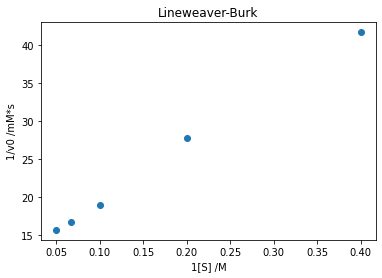

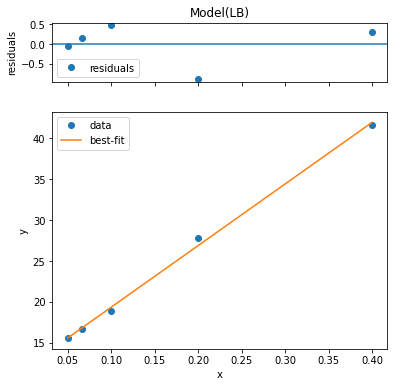

In [ ]:
# 10.2 Solution

# Lineweaver-Burk plots 1/v0 vs 1/[S]
v0_i = 1/v0
S_i = 1/S
import matplotlib.pyplot as plt
plt.plot(S_i, v0_i, 'o')
plt.title('Lineweaver-Burk')
plt.xlabel('1[S] /M')
plt.ylabel('1/v0 /mM*s')

# Lineweaver-Burk equation is 1/v0 = (Km/Vmax)*(1/[S])+(1/Vmax)
def LB(x, K, V):
    return (K/V)*x + 1/V 
K = 1; V = 1
mod = Model(LB)
result = mod.fit(v0_i, x=S_i, K=K, V=K)
result.plot()
result

Km = result.best_values['K']
Vm = result.best_values['V']
print('Km = %.3g mM' %Km)
print('Vmax = %.3g mM/s' %Vm)

Km = 6.52 mM
Vmax = 0.0856 mM/s


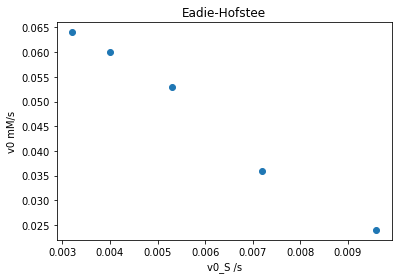

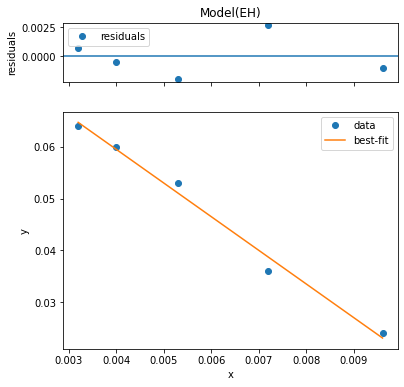

In [ ]:
# Eadie-Hofstee plots v0 vs v0/[S]
v0_S = v0/S
plt.plot(v0_S, v0, 'o')
plt.title('Eadie-Hofstee')
plt.xlabel('v0_S /s')
plt.ylabel('v0 mM/s')
plt.show


# Eadie-Hofstee equation is v0 = -Km(v0/[s])+Vmax
def EH(x, K, V):
    return -K*x + V
K = 1; V = 1
mod = Model(EH)
result = mod.fit(v0, x=v0_S, K=K, V=K)
result.plot()
result

Km = result.best_values['K']
Vm = result.best_values['V']
print('Km = %.3g mM' %Km)
print('Vmax = %.3g mM/s' %Vm)

Km = 6.56 mM
Vmax = 0.0859 mM/s


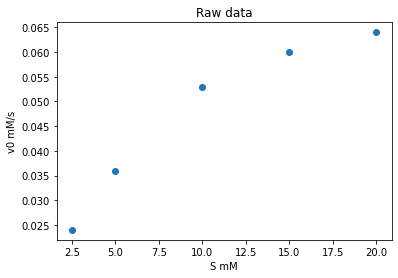

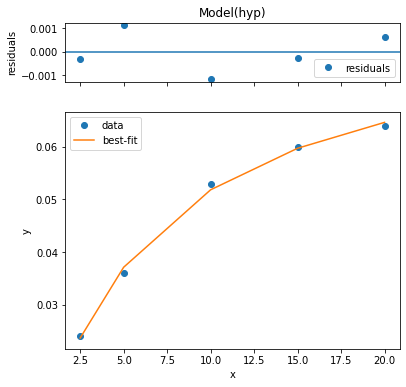

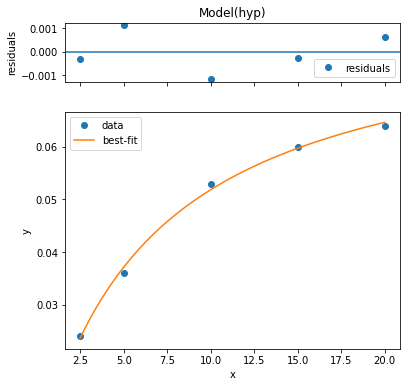

In [ ]:
# Raw data
plt.plot(S, v0, 'o')
plt.title('Raw data')
plt.xlabel('S mM')
plt.ylabel('v0 mM/s')

#!pip install lmfit
from lmfit import Model
# For raw data fit to MM equation (10.10 in textbook)
def hyp(x, K, V):
    return V/(1+K/x)
K = 1; V = 1
mod = Model(hyp)
result = mod.fit(v0, x=S, K=K, V=K)
result.plot()
result.plot(numpoints=101) #simulate more points in the best fit line
result

Km = result.best_values['K']
Vm = result.best_values['V']
print('Km = %.3g mM' %Km)
print('Vmax = %.3g mM/s' %Vm)